##### TimeSeries CASE STUDY - CHITRA CHANDRASHEKARAN & JAIMON FRANCIS

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.shape

(99999, 226)

In [4]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [7]:
df.select_dtypes(include=['object']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [8]:
df.isna().sum().sort_values(ascending=False).head(60)

count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
total_rech_data_6           74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
arpu_3g_7                   74428
count_rech_2g_7             74428
fb_user_7                   74428
count_rech_3g_7             74428
arpu_2g_7                   74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
night_pck_user_7            74428
total_rech_data_7           74428
date_of_last_rech_data_7    74428
night_pck_user_9            74077
date_of_last_rech_data_9    74077
fb_user_9                   74077
arpu_2g_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
total_rech_data_9           74077
av_rech_amt_data_9          74077
count_rech_3g_9             74077
count_rech_2g_

### Data Preparation

In [9]:
#Categorical Fields

In [10]:
# the below date fields are not relevant and can be dropped as it contains the last day of the month
# last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9

df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis = 1, inplace = True)

In [11]:
df.shape

(99999, 222)

In [12]:
train_categorical = df.select_dtypes(include=['object']).columns
train_categorical

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [13]:
df[train_categorical].head(50)

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0            6/21/2014           7/16/2014            8/8/2014   
1            6/29/2014           7/31/2014           8/28/2014   
2            6/17/2014           7/24/2014           8/14/2014   
3            6/28/2014           7/31/2014           8/31/2014   
4            6/26/2014           7/28/2014            8/9/2014   
5            6/19/2014           7/17/2014           8/24/2014   
6            6/28/2014           7/31/2014           8/28/2014   
7            6/27/2014           7/25/2014           8/26/2014   
8            6/25/2014           7/31/2014           8/30/2014   
9            6/29/2014           7/23/2014           8/29/2014   
10           6/14/2014            7/5/2014           8/27/2014   
11           6/18/2014           7/10/2014           8/21/2014   
12           6/26/2014           7/17/2014           8/10/2014   
13           6/20/2014           7/22/2014           8/30/2014   
14           6/19/2014           7/31/2014           8/24/2014   
15           6/14/2014           7/28/2014           8/30/2014   
16           6/30/2014           7/31/2014           8/14/2014   
17           6/30/2014           7/30/2014           8/25/2014   
18           6/17/2014           7/31/2014           8/29/2014   
19           6/27/2014           7/25/2014           8/26/2014   
20           6/14/2014           7/10/2014           8/27/2014   
21           6/30/2014           7/31/2014           8/31/2014   
22           6/19/2014            7/3/2014           8/28/2014   
23           6/18/2014            7/7/2014           8/24/2014   
24           6/23/2014           7/17/2014           8/31/2014   
25           6/30/2014           7/29/2014           8/19/2014   
26                 NaN           7/27/2014           8/25/2014   
27           6/14/2014           7/19/2014           8/24/2014   
28           6/22/2014           7/14/2014           8/29/2014   
29           6/30/2014           7/16/2014           8/24/2014   
30           6/26/2014           7/20/2014           8/24/2014   
31           6/28/2014           7/29/2014           8/25/2014   
32           6/27/2014           7/19/2014           8/22/2014   
33           6/30/2014           7/30/2014           8/26/2014   
34           6/24/2014           7/19/2014           8/19/2014   
35           6/12/2014            7/3/2014            8/2/2014   
36           6/20/2014           7/25/2014           8/24/2014   
37           6/17/2014           7/28/2014           8/28/2014   
38           6/30/2014           7/28/2014           8/24/2014   
39           6/14/2014            7/4/2014           8/13/2014   
40            6/3/2014           7/25/2014           8/26/2014   
41           6/24/2014           7/22/2014           8/31/2014   
42           6/11/2014           7/25/2014           8/30/2014   
43           6/22/2014           7/17/2014           8/24/2014   
44           6/17/2014           7/25/2014           8/30/2014   
45           6/28/2014           7/25/2014            8/5/2014   
46           6/29/2014           7/25/2014           8/24/2014   
47           6/17/2014           7/27/2014            8/5/2014   
48           6/29/2014           7/23/2014           8/28/2014   
49           6/21/2014           7/12/2014           8/14/2014   

   date_of_last_rech_9 date_of_last_rech_data_6 date_of_last_rech_data_7  \
0            9/28/2014                6/21/2014                7/16/2014   
1            9/30/2014                      NaN                7/25/2014   
2            9/29/2014                      NaN                      NaN   
3            9/30/2014                      NaN                      NaN   
4            9/28/2014                 6/4/2014                      NaN   
5            9/28/2014                      NaN                      NaN   
6            9/28/2014                      NaN                      NaN   
7            9/30/2014      

In [14]:
# Recharge dates can be converted to '1' and '0' to indicate whether recharge was done in respective months. 
# For NaN, we can impute with '0' inticating that no recharge was done
# Then convert categorical fields to numberic

In [15]:
for i in train_categorical:
    df[i].fillna(0, inplace=True)
    df[i] = df[i].apply(lambda x: 1 if x != 0 else x)

In [16]:
df[train_categorical].head(50)

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  \
0                     1                    1                    1   
1                     1                    1                    1   
2                     1                    1                    1   
3                     1                    1                    1   
4                     1                    1                    1   
5                     1                    1                    1   
6                     1                    1                    1   
7                     1                    1                    1   
8                     1                    1                    1   
9                     1                    1                    1   
10                    1                    1                    1   
11                    1                    1                    1   
12                    1                    1                    1   
13                    1                    1                    1   
14                    1                    1                    1   
15                    1                    1                    1   
16                    1                    1                    1   
17                    1                    1                    1   
18                    1                    1                    1   
19                    1                    1                    1   
20                    1                    1                    1   
21                    1                    1                    1   
22                    1                    1                    1   
23                    1                    1                    1   
24                    1                    1                    1   
25                    1                    1                    1   
26                    0                    1                    1   
27                    1                    1                    1   
28                    1                    1                    1   
29                    1                    1                    1   
30                    1                    1                    1   
31                    1                    1                    1   
32                    1                    1                    1   
33                    1                    1                    1   
34                    1                    1                    1   
35                    1                    1                    1   
36                    1                    1                    1   
37                    1                    1                    1   
38                    1                    1                    1   
39                    1                    1                    1   
40                    1                    1                    1   
41                    1                    1                    1   
42                    1                    1                    1   
43                    1                    1                    1   
44                    1                    1                    1   
45                    1                    1                    1   
46                    1                    1                    1   
47                    1                    1                    1   
48                    1                    1                    1   
49                    1                    1                    1   

    date_of_last_rech_9  date_of_last_rech_data_6  date_of_last_rech_data_7  \
0                     1                         1                         1   
1                     1                         0                         1   
2                     1                         0                         0   
3                     1                         0                         0   
4                     1                         1                         0   
5         

In [17]:
df[train_categorical].isna().sum()

date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_9         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
date_of_last_rech_data_9    0
dtype: int64

In [18]:
df[train_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
date_of_last_rech_6         99999 non-null int64
date_of_last_rech_7         99999 non-null int64
date_of_last_rech_8         99999 non-null int64
date_of_last_rech_9         99999 non-null int64
date_of_last_rech_data_6    99999 non-null int64
date_of_last_rech_data_7    99999 non-null int64
date_of_last_rech_data_8    99999 non-null int64
date_of_last_rech_data_9    99999 non-null int64
dtypes: int64(8)
memory usage: 6.1 MB


##### Observation: All categorical fields are imputed and converted to numeric fields

In [19]:
# Numeric Fields

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 222 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(43)
memory usage: 169.4 MB


In [21]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 222 columns]

Obervation:
a. 'mobile_number' can be removed as it is not required for modelling

b. 'circle_id' column can be dropped as it has the same value for all customers - all customer belong to same circle.

c. There are columns which have only zero and NAN values. we can drop these columns as it will not help in the model building

drop the below columns as they have only zeros and NaN
'loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_t2o_mou_9'

In [22]:
df.drop(['loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_t2o_mou_9',
'circle_id',
'mobile_number'],axis=1,inplace=True)

In [23]:
train_numerical = df.select_dtypes(include=['float64','int64']).columns
train_numerical

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=209)

In [24]:
# Imputing null values

In [25]:
df[train_numerical].isna().sum().sort_values(ascending=False).head(60)

arpu_3g_6             74846
count_rech_3g_6       74846
night_pck_user_6      74846
total_rech_data_6     74846
arpu_2g_6             74846
fb_user_6             74846
max_rech_data_6       74846
count_rech_2g_6       74846
av_rech_amt_data_6    74846
fb_user_7             74428
count_rech_3g_7       74428
max_rech_data_7       74428
arpu_3g_7             74428
night_pck_user_7      74428
total_rech_data_7     74428
arpu_2g_7             74428
av_rech_amt_data_7    74428
count_rech_2g_7       74428
arpu_3g_9             74077
arpu_2g_9             74077
count_rech_2g_9       74077
count_rech_3g_9       74077
night_pck_user_9      74077
total_rech_data_9     74077
max_rech_data_9       74077
fb_user_9             74077
av_rech_amt_data_9    74077
count_rech_2g_8       73660
total_rech_data_8     73660
count_rech_3g_8       73660
fb_user_8             73660
arpu_3g_8             73660
arpu_2g_8             73660
max_rech_data_8       73660
night_pck_user_8      73660
av_rech_amt_data_8  

In [26]:
df[['total_og_mou_6',
'total_og_mou_7',
'total_og_mou_8',
'total_og_mou_9',
'total_ic_mou_6',
'total_ic_mou_7',
'total_ic_mou_8',
'total_ic_mou_9',
'total_rech_num_6',
'total_rech_num_7',
'total_rech_num_8',
'total_rech_num_9',
'total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8',
'total_rech_amt_9',
'total_rech_data_6',
'total_rech_data_7',
'total_rech_data_8',
'total_rech_data_9',
'max_rech_data_6',
'max_rech_data_7',
'max_rech_data_8',
'max_rech_data_9',
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'av_rech_amt_data_8',
'av_rech_amt_data_9',
'vol_2g_mb_6',
'vol_2g_mb_7',
'vol_2g_mb_8',
'vol_2g_mb_9',
'vol_3g_mb_6',
'vol_3g_mb_7',
'vol_3g_mb_8',
'vol_3g_mb_9']].isna().sum()

total_og_mou_6            0
total_og_mou_7            0
total_og_mou_8            0
total_og_mou_9            0
total_ic_mou_6            0
total_ic_mou_7            0
total_ic_mou_8            0
total_ic_mou_9            0
total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
vol_2g_mb_6               0
vol_2g_mb_7               0
vol_2g_mb_8               0
vol_2g_mb_9               0
vol_3g_mb_6               0
vol_3g_mb_7               0
vol_3g_mb_8               0
vol_3g_mb_9         

Observation: There are no customer with both call and data usage values missing; so no rows to drop at this stage

In [27]:
df[train_numerical[train_numerical.str.contains('_6')]].isna().sum()

arpu_6                          0
onnet_mou_6                  3937
offnet_mou_6                 3937
roam_ic_mou_6                3937
roam_og_mou_6                3937
loc_og_t2t_mou_6             3937
loc_og_t2m_mou_6             3937
loc_og_t2f_mou_6             3937
loc_og_t2c_mou_6             3937
loc_og_mou_6                 3937
std_og_t2t_mou_6             3937
std_og_t2m_mou_6             3937
std_og_t2f_mou_6             3937
std_og_mou_6                 3937
isd_og_mou_6                 3937
spl_og_mou_6                 3937
og_others_6                  3937
total_og_mou_6                  0
loc_ic_t2t_mou_6             3937
loc_ic_t2m_mou_6             3937
loc_ic_t2f_mou_6             3937
loc_ic_mou_6                 3937
std_ic_t2t_mou_6             3937
std_ic_t2m_mou_6             3937
std_ic_t2f_mou_6             3937
std_ic_mou_6                 3937
total_ic_mou_6                  0
spl_ic_mou_6                 3937
isd_ic_mou_6                 3937
ic_others_6   

In [28]:
df[train_numerical[train_numerical.str.contains('_7')]].isna().sum()

arpu_7                          0
onnet_mou_7                  3859
offnet_mou_7                 3859
roam_ic_mou_7                3859
roam_og_mou_7                3859
loc_og_t2t_mou_7             3859
loc_og_t2m_mou_7             3859
loc_og_t2f_mou_7             3859
loc_og_t2c_mou_7             3859
loc_og_mou_7                 3859
std_og_t2t_mou_7             3859
std_og_t2m_mou_7             3859
std_og_t2f_mou_7             3859
std_og_mou_7                 3859
isd_og_mou_7                 3859
spl_og_mou_7                 3859
og_others_7                  3859
total_og_mou_7                  0
loc_ic_t2t_mou_7             3859
loc_ic_t2m_mou_7             3859
loc_ic_t2f_mou_7             3859
loc_ic_mou_7                 3859
std_ic_t2t_mou_7             3859
std_ic_t2m_mou_7             3859
std_ic_t2f_mou_7             3859
std_ic_mou_7                 3859
total_ic_mou_7                  0
spl_ic_mou_7                 3859
isd_ic_mou_7                 3859
ic_others_7   

In [29]:
df[train_numerical[train_numerical.str.contains('_8')]].isna().sum()

arpu_8                          0
onnet_mou_8                  5378
offnet_mou_8                 5378
roam_ic_mou_8                5378
roam_og_mou_8                5378
loc_og_t2t_mou_8             5378
loc_og_t2m_mou_8             5378
loc_og_t2f_mou_8             5378
loc_og_t2c_mou_8             5378
loc_og_mou_8                 5378
std_og_t2t_mou_8             5378
std_og_t2m_mou_8             5378
std_og_t2f_mou_8             5378
std_og_mou_8                 5378
isd_og_mou_8                 5378
spl_og_mou_8                 5378
og_others_8                  5378
total_og_mou_8                  0
loc_ic_t2t_mou_8             5378
loc_ic_t2m_mou_8             5378
loc_ic_t2f_mou_8             5378
loc_ic_mou_8                 5378
std_ic_t2t_mou_8             5378
std_ic_t2m_mou_8             5378
std_ic_t2f_mou_8             5378
std_ic_mou_8                 5378
total_ic_mou_8                  0
spl_ic_mou_8                 5378
isd_ic_mou_8                 5378
ic_others_8   

In [30]:
df[train_numerical[train_numerical.str.contains('_9')]].isna().sum()

arpu_9                          0
onnet_mou_9                  7745
offnet_mou_9                 7745
roam_ic_mou_9                7745
roam_og_mou_9                7745
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_9             7745
loc_og_t2f_mou_9             7745
loc_og_t2c_mou_9             7745
loc_og_mou_9                 7745
std_og_t2t_mou_9             7745
std_og_t2m_mou_9             7745
std_og_t2f_mou_9             7745
std_og_mou_9                 7745
isd_og_mou_9                 7745
spl_og_mou_9                 7745
og_others_9                  7745
total_og_mou_9                  0
loc_ic_t2t_mou_9             7745
loc_ic_t2m_mou_9             7745
loc_ic_t2f_mou_9             7745
loc_ic_mou_9                 7745
std_ic_t2t_mou_9             7745
std_ic_t2m_mou_9             7745
std_ic_t2f_mou_9             7745
std_ic_mou_9                 7745
total_ic_mou_9                  0
spl_ic_mou_9                 7745
isd_ic_mou_9                 7745
ic_others_9   

Observation: There is a pattern in missing data amoung call usage and data usage for each respective months. These seem to meaningful value missing and hence we can impute all these missing values with zeros.

In [31]:
df[train_numerical[train_numerical.str.contains('_6')]] = df[train_numerical[train_numerical.str.contains('_6')]].fillna(0)
df[train_numerical[train_numerical.str.contains('_7')]] = df[train_numerical[train_numerical.str.contains('_7')]].fillna(0)
df[train_numerical[train_numerical.str.contains('_8')]] = df[train_numerical[train_numerical.str.contains('_8')]].fillna(0)
df[train_numerical[train_numerical.str.contains('_9')]] = df[train_numerical[train_numerical.str.contains('_9')]].fillna(0)

In [32]:
df.isna().sum().sort_values(ascending=False)

sep_vbc_3g             0
std_ic_mou_9           0
loc_ic_t2t_mou_9       0
loc_ic_t2t_mou_8       0
loc_ic_t2t_mou_7       0
                      ..
date_of_last_rech_9    0
date_of_last_rech_8    0
date_of_last_rech_7    0
date_of_last_rech_6    0
arpu_6                 0
Length: 209, dtype: int64

Observation: All null or NAN values are imputed

In [33]:
# Convert coulmns to int which have counts or numbers

In [34]:
cols = ['total_rech_data_6',
'total_rech_data_7',
'total_rech_data_8',
'total_rech_data_9',
'count_rech_2g_6',
'count_rech_2g_7',
'count_rech_2g_8',
'count_rech_2g_9',
'count_rech_3g_6',
'count_rech_3g_7',
'count_rech_3g_8',
'count_rech_3g_9',
'fb_user_6',
'fb_user_7',
'fb_user_8',
'fb_user_9']

In [35]:
df[cols]

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
0                    1.0                1.0                1.0   
1                    0.0                1.0                2.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    1.0                0.0                0.0   
...                  ...                ...                ...   
99994                0.0                0.0                0.0   
99995                0.0                0.0                0.0   
99996                2.0                0.0                0.0   
99997                3.0                2.0                4.0   
99998                1.0                0.0                0.0   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
0                    0.0              0.0              0.0              0.0   
1                    0.0              0.0              1.0              2.0   
2                    1.0              0.0              0.0              0.0   
3                    0.0              0.0              0.0              0.0   
4                    0.0              1.0              0.0              0.0   
...                  ...              ...              ...              ...   
99994                0.0              0.0              0.0              0.0   
99995                0.0              0.0              0.0              0.0   
99996                0.0              2.0              0.0              0.0   
99997                4.0              1.0              0.0              0.0   
99998                0.0              1.0              0.0              0.0   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
0                  0.0              1.0              1.0              1.0   
1                  0.0              0.0              0.0              0.0   
2                  1.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
99994              0.0              0.0              0.0              0.0   
99995              0.0              0.0              0.0              0.0   
99996              0.0              0.0              0.0              0.0   
99997              0.0              2.0              2.0              4.0   
99998              0.0              0.0              0.0              0.0   

       count_rech_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  
0                  0.0        1.0        1.0        1.0        0.0  
1                  0.0        0.0        1.0        1.0        0.0  
2                  0.0        0.0        0.0        0.0        1.0  
3                  0.0        0.0        0.0        0.0        0.0  
4                  0.0        0.0        0.0        0.0        0.0  
...                ...        ...        ...        ...        ...  
99994              0.0        0.0        0.0        0.0        0.0  
99995              0.0        0.0        0.0        0.0        0.0  
99996              0.0        1.0        0.0        0.0        0.0  
99997              4.0        1.0        1.0        1.0        1.0  
99998              0.0        1.0        0.0        0.0        0.0  

[99999 rows x 16 columns]

In [36]:
df[cols]=df[cols].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 209 entries, arpu_6 to sep_vbc_3g
dtypes: float64(152), int32(16), int64(41)
memory usage: 153.3 MB


In [38]:
#Outlier Treatment

In [39]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [40]:
# Analyse the columns by months

df[train_numerical[train_numerical.str.contains('_6')]].describe()

arpu_6   onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     282.987358    127.183397    190.142776       9.558277      13.363643   
std      328.439770    292.433718    312.928229      71.403643      70.074931   
min    -2258.709000      0.000000      0.000000       0.000000       0.000000   
25%       93.411500      5.430000     28.760000       0.000000       0.000000   
50%      197.704000     30.980000     89.680000       0.000000       0.000000   
75%      371.060000    112.610000    222.535000       0.000000       0.000000   
max    27731.088000   7376.710000   8362.360000   13724.380000    3775.110000   

       loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          45.246387         89.667174          3.603334          1.078841   
std          148.140370        160.573349         13.966557          5.345068   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.990000          7.290000          0.000000          0.000000   
50%           10.680000         37.690000          0.000000          0.000000   
75%           38.820000        105.780000          1.860000          0.000000   
max         6431.330000       4729.740000       1466.030000        342.860000   

       loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
count  99999.000000      99999.000000      99999.000000      99999.000000   
mean     138.523918         76.686937         83.862603          1.084561   
std      248.334416        247.943052        251.109975          7.829284   
min        0.000000          0.000000          0.000000          0.000000   
25%       12.930000          0.000000          0.000000          0.000000   
50%       59.910000          0.000000          2.890000          0.000000   
75%      161.920000         26.910000         48.790000          0.000000   
max    10643.380000       7366.580000       8314.760000        628.560000   

       std_og_mou_6  isd_og_mou_6  spl_og_mou_6   og_others_6  total_og_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000    99999.000000   
mean     161.636708      0.766849      3.762604      0.436277      305.133424   
std      383.593393     25.253433     14.659270      4.044839      463.419481   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000       44.740000   
50%        9.180000      0.000000      0.000000      0.000000      145.140000   
75%      132.490000      0.000000      2.180000      0.000000      372.860000   
max     8432.990000   5900.660000   1023.210000    800.890000    10674.030000   

       loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
count      99999.000000      99999.000000      99999.000000  99999.000000   
mean          46.035643        103.244291         11.608541    160.896870   
std          137.785270        169.592626         39.412899    251.192138   
min            0.000000          0.000000          0.000000      0.000000   
25%            2.060000         13.810000          0.000000     24.680000   
50%           14.190000         52.360000          0.680000     86.040000   
75%           44.690000        127.600000          7.530000    200.580000   
max         6626.930000       4693.860000       1872.340000   7454.630000   

       std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6  \
count      99999.000000      99999.000000      99999.000000  99999.000000   
mean           9.198983         19.906397          2.071499     31.179327   
std           53.282903         79.289474         16.173049    104.361211   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000         

In [41]:
df_6 = df[train_numerical[train_numerical.str.contains('_6')]]

In [42]:
cols_6 = df_6.columns

In [43]:
cols_6

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6',
       'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6',
       'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6',
       'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6

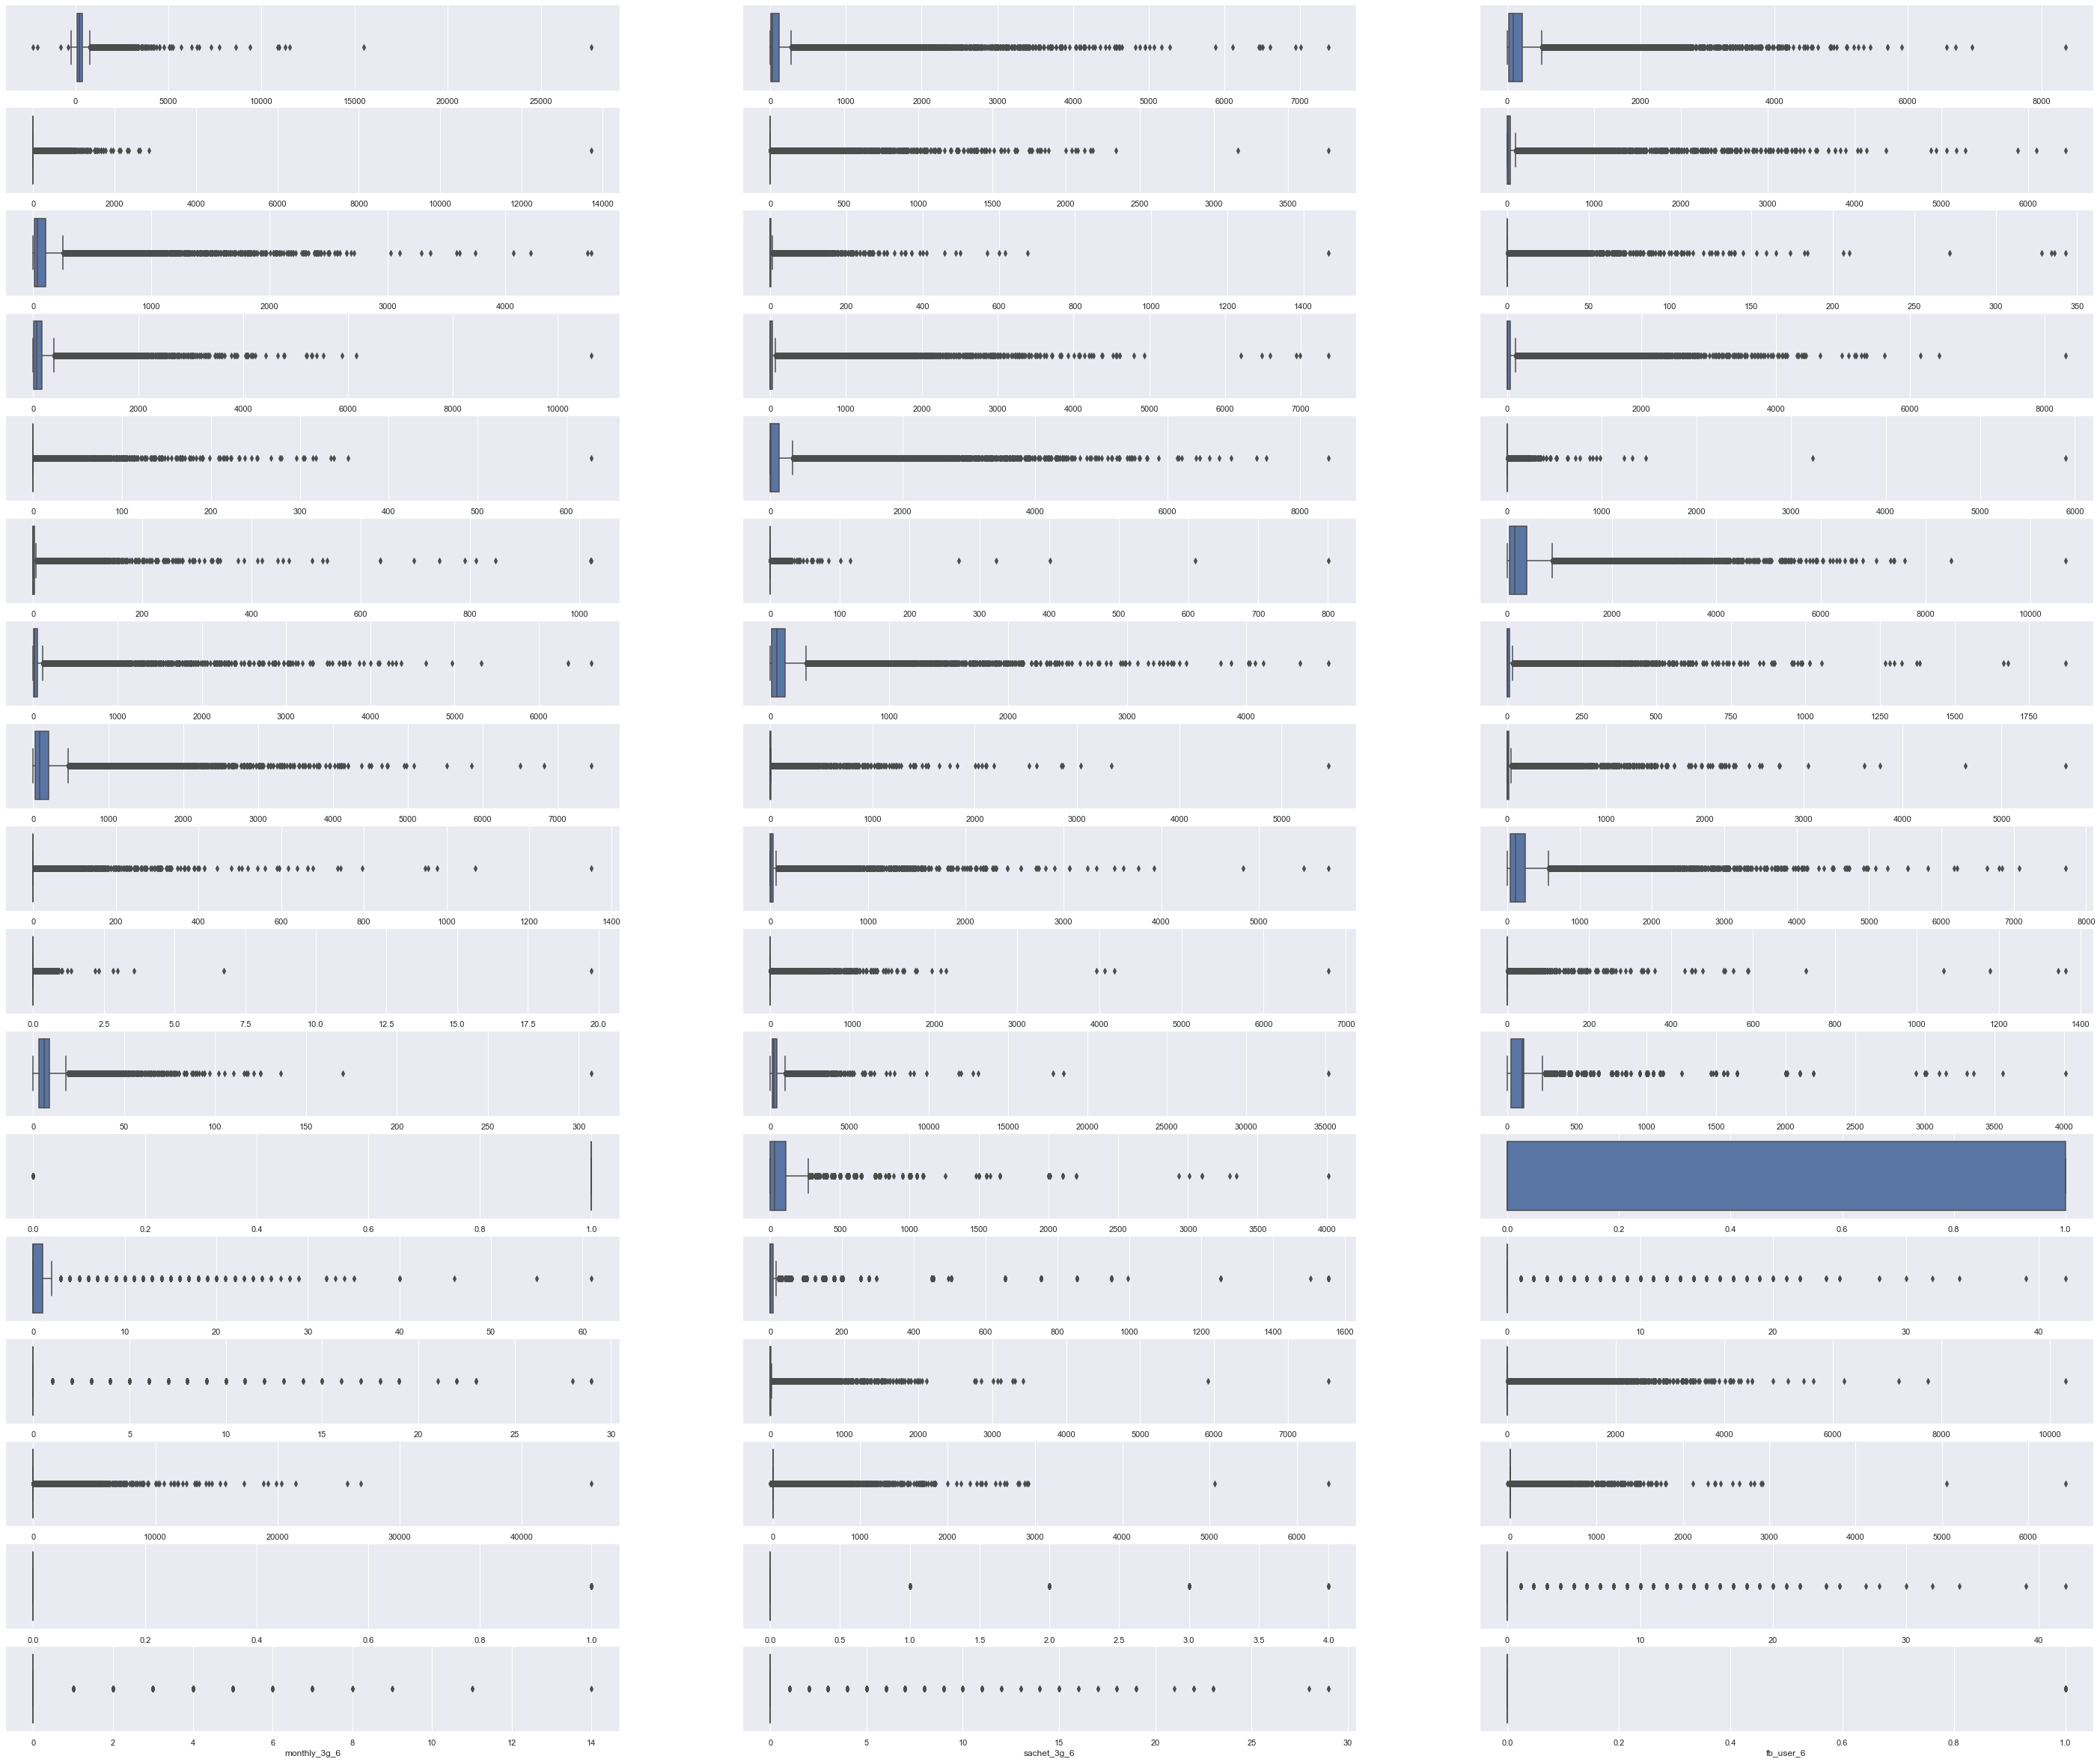

In [44]:
plt.figure(figsize=(50,50))
for i in enumerate(cols_6):   # enumerate add index to the elements
    plt.subplot(20,3,i[0]+1)
    sns.boxplot(x=i[1],data=df_6)

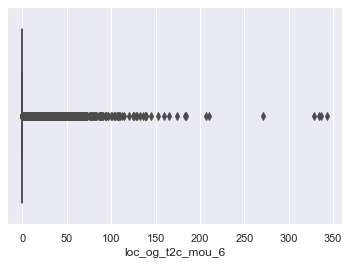

In [45]:
sns.boxplot(df['loc_og_t2c_mou_6']);

Observation: We cannot perform outlier treat as it might impact the HVC (High Value Customer) and will impact identifying such customers

### Identfying High Value Customer

In [46]:
df[['total_rech_amt_6','total_rech_amt_7']]

total_rech_amt_6  total_rech_amt_7
0                   362               252
1                    74               384
2                   168               315
3                   230               310
4                   196               350
...                 ...               ...
99994                60               110
99995               110               110
99996               119                 0
99997               381               358
99998               710                 0

[99999 rows x 2 columns]

In [47]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [48]:
df[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_6_7']]

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_6_7
0                   362               252             307.0
1                    74               384             229.0
2                   168               315             241.5
3                   230               310             270.0
4                   196               350             273.0
...                 ...               ...               ...
99994                60               110              85.0
99995               110               110             110.0
99996               119                 0              59.5
99997               381               358             369.5
99998               710                 0             355.0

[99999 rows x 3 columns]

In [49]:
avg_rech_70 = df['avg_rech_amt_6_7'].quantile(.7)
avg_rech_70

368.5

In [50]:
df_hvc = df[df['avg_rech_amt_6_7'].apply(lambda x : x if x >= avg_rech_70 else 'x')!='x']

In [51]:
df_hvc 

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7      1069.180  1349.850  3171.480  500.000        57.84        54.68   
8       378.721   492.223   137.362  166.787       413.69       351.03   
13      492.846   205.671   593.260  322.732       501.76       108.39   
16      430.975   299.869   187.894  206.490        50.51        74.01   
17      690.008    18.980    25.499  257.583      1185.91         9.28   
...         ...       ...       ...      ...          ...          ...   
99970   261.269   410.614   290.851  330.963         5.01       142.59   
99974   414.303   321.093   371.016  306.689        17.56         0.00   
99986   644.973   455.228   564.334  267.451       806.73       549.36   
99988   312.558   512.932   402.080  533.502       199.89       174.46   
99997   322.991   303.386   606.817  731.010         0.00         0.00   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7            52.29         0.00        453.43        567.16        325.91   
8            35.08        33.46         94.66         80.63        136.48   
13          534.24       244.81        413.31        119.28        482.46   
16           70.61        31.34        296.29        229.74        162.76   
17            7.79       558.51         61.64          0.00          5.54   
...            ...          ...           ...           ...           ...   
99970        97.61       206.19        329.58        500.14        355.48   
99974         1.30         2.46        428.41        366.78        360.58   
99986       775.41       692.63        784.76        617.13        595.44   
99988         2.46         7.16        175.88        277.01        248.33   
99997         0.00         0.00          0.00          0.00          0.00   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7              0.00          16.23          33.49          31.64   
8            108.71           0.00           0.00           0.00   
13           214.06          23.53         144.24          72.11   
16           224.39           0.00           2.83           0.00   
17            87.89           0.00           4.76           4.81   
...             ...            ...            ...            ...   
99970        196.51           5.06           0.00           0.00   
99974        364.34           0.00           0.00           0.00   
99986        378.93           0.00           0.00           0.00   
99988        217.44           0.00           0.00           0.00   
99997          0.00           0.00           0.00           0.00   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7               0.00          23.74          12.59          38.06   
8               0.00           0.00           0.00           0.00   
13            136.78           7.98          35.26           1.44   
16              0.00           0.00          17.74           0.00   
17              0.00           0.00           8.46          13.34   
...              ...            ...            ...            ...   
99970           0.00          46.04           0.00           0.00   
99974           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988          63.96           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7               0.00             51.39             31.38             40.28   
8               0.00            297.13            217.59             12.49   
13             12.78             49.63              6.19             36.01   
16              0.00             42.61             65.16             67.38   
17             17.98             38.99              0.00              0.00   
...              ...               ...               ...               ...   
999

In [52]:
df_hvc['avg_rech_amt_6_7'].sort_values()

60384      368.5
67067      368.5
66359      368.5
96854      368.5
79154      368.5
          ...   
98208    10265.0
67717    16150.0
51314    17282.5
33019    18750.0
38610    37762.5
Name: avg_rech_amt_6_7, Length: 30011, dtype: float64

### Derive Churn for 9th Month

In [53]:
# churn_indicator
df_hvc['churn_indicator'] = [1 if a == 0 and b == 0 and c == 0 and d ==0 else 0 for a,b,c,d in zip(df_hvc['total_ic_mou_9'],df_hvc['total_og_mou_9'],df_hvc['vol_2g_mb_9'], df_hvc['vol_3g_mb_9'])]

In [54]:
df_hvc[df_hvc['total_ic_mou_9'] == 0][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn_indicator']].head(60)

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  \
7                0.0            0.00         0.00         0.00   
97               0.0            0.00         0.00         0.00   
111              0.0            0.00         0.00         0.00   
143              0.0            0.00         0.00         0.00   
188              0.0            0.00         0.00         0.00   
199              0.0            0.00         0.00         0.00   
320              0.0            0.00         0.00         0.00   
358              0.0            0.00         0.00         0.00   
385              0.0            1.63         0.00         0.00   
423              0.0            0.34         4.52       423.59   
435              0.0            0.00         9.91      1985.77   
478              0.0            0.00         0.00         0.00   
490              0.0            0.00         0.00         0.00   
527              0.0            0.00         0.00         0.00   
539              0.0            0.00         0.00         0.00   
549              0.0            0.00         0.00         0.00   
578              0.0            0.00         0.00         0.00   
585              0.0            0.00       100.25         0.00   
590              0.0            0.00         0.00         0.00   
594              0.0            0.00         0.00         0.00   
603              0.0         2191.13         0.00         0.00   
679              0.0            0.00         0.00         0.00   
690              0.0            0.00         0.00         0.00   
691              0.0            0.00         0.00         0.00   
720              0.0            0.00         0.00         0.00   
723              0.0            0.00         0.00         0.00   
746              0.0            0.00         0.00         0.00   
763              0.0            0.00         0.00         0.00   
780              0.0            0.00         0.00         0.00   
844              0.0            0.00         0.00         0.00   
845              0.0            0.00         0.00         0.00   
891              0.0           76.59        47.35       470.43   
895              0.0            0.00         0.00         0.00   
933              0.0            0.00         0.00         0.00   
947              0.0            0.00         0.00         0.00   
977              0.0            0.00      1059.76      2168.27   
999              0.0            0.00         0.00         0.00   
1022             0.0            0.00         0.00         0.00   
1099             0.0            0.00         0.00         0.00   
1151             0.0            0.00         0.00         0.00   
1187             0.0            0.00         0.00         0.00   
1272             0.0            0.00         0.00         0.00   
1342             0.0            0.00         0.00         0.00   
1395             0.0            0.00         0.00         0.00   
1397             0.0            0.00         0.00         0.00   
1420             0.0            0.00         0.00         0.00   
1443             0.0            0.00         0.00         0.00   
1489             0.0            0.00       270.18       929.66   
1496             0.0            0.00         0.00         0.00   
1524             0.0            0.00         0.00         0.00   
1555             0.0            0.00         0.00         0.00   
1713             0.0            0.00         0.00         0.00   
1768             0.0            0.00         0.00         0.00   
1775             0.0            0.00         0.00         0.00   
1796             0.0            0.00         0.00         0.00   
1802             0.0            0.00         0.00         0.00   
1824             0.0            0.00         0.00         0.00   
1859             0.0            0.00         0.00         0.00   
1913             0.0            0.00         0.00         0.00   
1952             0.0            0.00         0

In [55]:
cols = df_hvc.columns

In [56]:
df_hvc.drop(df_hvc[cols[cols.str.contains('_9')]],axis=1,inplace=True)

In [57]:
df_hvc.drop('sep_vbc_3g',axis=1,inplace=True)

In [58]:
df_hvc.shape

(30011, 159)

In [59]:
df_hvc

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7      1069.180  1349.850  3171.480        57.84        54.68        52.29   
8       378.721   492.223   137.362       413.69       351.03        35.08   
13      492.846   205.671   593.260       501.76       108.39       534.24   
16      430.975   299.869   187.894        50.51        74.01        70.61   
17      690.008    18.980    25.499      1185.91         9.28         7.79   
...         ...       ...       ...          ...          ...          ...   
99970   261.269   410.614   290.851         5.01       142.59        97.61   
99974   414.303   321.093   371.016        17.56         0.00         1.30   
99986   644.973   455.228   564.334       806.73       549.36       775.41   
99988   312.558   512.932   402.080       199.89       174.46         2.46   
99997   322.991   303.386   606.817         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7            453.43        567.16        325.91          16.23          33.49   
8             94.66         80.63        136.48           0.00           0.00   
13           413.31        119.28        482.46          23.53         144.24   
16           296.29        229.74        162.76           0.00           2.83   
17            61.64          0.00          5.54           0.00           4.76   
...             ...           ...           ...            ...            ...   
99970        329.58        500.14        355.48           5.06           0.00   
99974        428.41        366.78        360.58           0.00           0.00   
99986        784.76        617.13        595.44           0.00           0.00   
99988        175.88        277.01        248.33           0.00           0.00   
99997          0.00          0.00          0.00           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7              31.64          23.74          12.59          38.06   
8               0.00           0.00           0.00           0.00   
13             72.11           7.98          35.26           1.44   
16              0.00           0.00          17.74           0.00   
17              4.81           0.00           8.46          13.34   
...              ...            ...            ...            ...   
99970           0.00          46.04           0.00           0.00   
99974           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7                 51.39             31.38             40.28            308.63   
8                297.13            217.59             12.49             80.96   
13                49.63              6.19             36.01            151.13   
16                42.61             65.16             67.38            273.29   
17                38.99              0.00              0.00             58.54   
...                 ...               ...               ...               ...   
99970              5.01            131.71             76.83              7.83   
99974             10.11              0.00              0.00            403.08   
99986            709.21            496.14            718.56            574.93   
99988            170.28            146.48              2.46            137.83   
99997              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7                447.38            162.28             62.13             55.14   
8                 70.58             50.54              0.00              0.00   
13                47.28            294.46             

In [60]:
cols = df_hvc.columns

In [61]:
cols[:100]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou

In [62]:
cols[100:200]

Index(['date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 

In [63]:
df_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 159 entries, arpu_6 to churn_indicator
dtypes: float64(115), int32(12), int64(32)
memory usage: 35.3 MB


In [64]:
df_hvc.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     587.284404    589.135427    534.857433    296.034461    304.343206   
std      442.722413    462.897814    492.259586    460.775592    481.780488   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      364.161000    365.004500    289.609500     41.110000     40.950000   
50%      495.682000    493.561000    452.091000    125.830000    125.460000   
75%      703.922000    700.788000    671.150000    353.310000    359.925000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30011.000000  30011.000000  30011.000000  30011.000000   30011.000000   
mean     267.600412    417.933372    423.924375    375.021691      17.412764   
std      466.560947    470.588583    486.525332    477.489377      79.152657   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       27.010000    137.335000    135.680000     95.695000       0.000000   
50%       99.440000    282.190000    281.940000    240.940000       0.000000   
75%      297.735000    523.125000    532.695000    482.610000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30011.000000    30011.00000   30011.000000   30011.000000   
mean       13.522114       13.25627      29.321648      22.036003   
std        76.303736       74.55207     118.570414      97.925249   
min         0.000000        0.00000       0.000000       0.000000   
25%         0.000000        0.00000       0.000000       0.000000   
50%         0.000000        0.00000       0.000000       0.000000   
75%         0.000000        0.00000       0.000000       0.000000   
max      3813.290000     4169.81000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30011.000000      30011.000000      30011.000000      30011.000000   
mean       21.469272         94.680696         95.729729         87.139995   
std       106.244774        236.849265        248.132623        234.721938   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          8.320000          9.130000          5.790000   
50%         0.000000         32.590000         33.160000         28.640000   
75%         0.000000         91.460000         91.480000         84.670000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30011.000000      30011.000000      30011.000000       30011.00000   
mean         181.279583        181.271524        167.591199           6.97933   
std          250.132066        240.722132        234.862468          22.66552   
min            0.000000          0.000000          0.000000           0.00000   
25%           30.290000         33.580000         22.420000           0.00000   
50%          101.240000        104.340000         89.810000           0.33000   
75%          240.165000        239.485000        223.590000           5.09000   
max         4729.740000       4557.140000       4961.330000        1466.03000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean           7.097268          6.494314          1.567160          1.862229   
std           22.588864         20.220028          6.889317          9.255645   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.400000          0.1600

### Test Train Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# putting target varaible 'churn_indicator' to  'y'

y = df_hvc['churn_indicator']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn_indicator, dtype: int64

In [67]:
# Taking depended variable X

X=df_hvc.drop('churn_indicator',1)

X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [68]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Treating Data imbalance with smothe 

In [94]:
y_train.value_counts()

1    19184
0    19184
Name: churn_indicator, dtype: int64

Text(0.5, 1.0, 'churned')

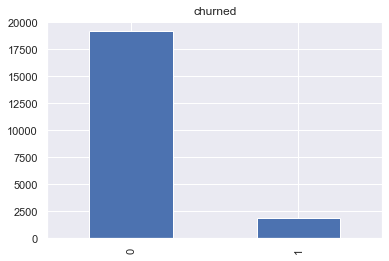

In [69]:
y_train.value_counts().plot('bar').set_title('churned')


In [ ]:
## imbalanced data seen above , churn counts are very less

In [70]:
from imblearn.over_sampling import SMOTE


In [71]:
sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [95]:
## after treating imbalanced data

Text(0.5, 1.0, 'churned')

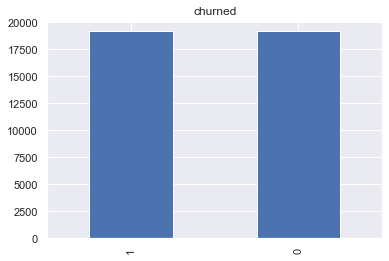

In [73]:
y_train.value_counts().plot('bar').set_title('churned')


### Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
X_train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  38368.000000  38368.000000  38368.000000  38368.000000  38368.000000   
mean     614.693866    561.989358    395.312112    336.488229    298.064694   
std      424.342082    468.630916    441.191382    506.125690    478.060451   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      374.781419    337.867500     76.493648     44.091375     35.568408   
50%      521.268868    477.789500    321.909000    136.925079    117.687292   
75%      752.574862    682.756670    557.581679    413.905982    351.806042   
max    15487.684000  16820.145000  19295.904000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  38368.000000  38368.000000  38368.000000  38368.000000   38368.000000   
mean     196.986850    451.614157    409.663341    266.511889      20.425985   
std      415.281843    532.003587    517.721123    415.947312      90.875536   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.562363    132.712817    105.459103     16.310175       0.000000   
50%       47.693736    285.780000    248.209452    134.085000       0.000000   
75%      192.727231    564.041184    516.973386    348.430000       1.835295   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   38368.000000   38368.000000   38368.000000   38368.000000   
mean       19.127887      18.691502      36.016917      31.793062   
std        98.400041      88.202807     132.379110     112.318321   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.690000       4.509842       5.197128      10.010610   
max      3813.290000    4169.810000    2337.160000    1878.860000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   38368.000000      38368.000000      38368.000000      38368.000000   
mean       29.488037         80.487278         71.913342         54.386127   
std       106.021008        223.298662        207.110427        187.423577   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.830000          5.324470          0.000000   
50%         0.000000         25.653849         22.390000          9.430000   
75%        10.902713         73.715000         65.636533         45.710000   
max      3493.360000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      38368.000000      38368.000000      38368.000000      38368.000000   
mean         151.590019        138.296704        106.432086          5.446276   
std          230.701530        212.853416        196.783153         24.052218   
min            0.000000          0.000000          0.000000          0.000000   
25%           24.089416         19.240000          0.082089          0.000000   
50%           74.210000         66.931821         28.680000          0.125959   
75%          192.765000        174.740000        133.630000          3.171104   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      38368.000000      38368.000000      38368.000000      38368.000000   
mean           5.205318          4.122128          1.513759          1.847089   
std           22.318995         15.971537          6.870592          8.512384   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.004273          0.0000

### not to be scaled
mobile_number
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8

In [76]:
no_scale_cols = X_train[[
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8',
'fb_user_6',
'fb_user_7',
'fb_user_8']].columns

In [77]:
no_scale_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [78]:
cols =  X_train.columns

In [79]:
cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_6_7'],
      dtype='object', length=158)

In [80]:
scale_cols = cols.difference(no_scale_cols)

scale_cols

Index(['aon', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'total_rech_data_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'],
      dtype='object', length=146)

In [81]:
scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

X_train.head(20)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  -0.667842 -0.174285 -0.019586    -0.000313     0.557919     0.546920   
1  -0.694451 -0.113755  0.192857    -0.447342    -0.565887    -0.158826   
2  -0.767087  0.513811  0.379280    -0.613093    -0.449164    -0.270318   
3  -0.289350  0.018699  0.339045    -0.315061     0.253476    -0.213778   
4   0.038932  0.073440 -0.266822    -0.431338    -0.122757    -0.320574   
5  -0.462430 -0.355857  0.071287    -0.371312    -0.398981    -0.253342   
6   0.467054  0.786844 -0.016825    -0.177524    -0.095857     0.502444   
7  -0.680361  0.640832  1.074556    -0.383799    -0.403981    -0.240675   
8   0.043183 -0.549334  0.025164    -0.487728    -0.471546    -0.161090   
9  -0.777444  0.241937  0.479807    -0.644015    -0.282990    -0.009336   
10  0.070348  0.776418  0.670006    -0.367104    -0.276819    -0.041964   
11 -0.479320 -0.316252 -0.316815     0.602530     0.836548     0.669562   
12  0.335852 -0.121640  0.390980    -0.527540    -0.582120    -0.367603   
13 -0.810948 -0.238819  0.019003    -0.296666    -0.059940     0.755336   
14 -0.276994 -0.020550  0.365213     0.026282     0.264228     0.466372   
15  0.041390 -0.147485  0.131065     0.098933     0.139681     0.348258   
16 -0.016289 -0.346118 -0.070123     1.409632     0.613665     0.321288   
17  0.343831  0.540969  1.708582    -0.567808    -0.423560    -0.275857   
18 -0.212956  0.300043  0.243929    -0.633504    -0.608978    -0.411526   
19 -0.824322 -0.303945 -0.257321    -0.528489    -0.573480    -0.324740   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      -0.557662     -0.653996     -0.428838      -0.224772      -0.194392   
1      -0.433751     -0.563676     -0.234460      -0.224772      -0.194392   
2      -0.460537      0.249803      0.348410      -0.224772      -0.194392   
3       0.356517      0.385727      1.320204      -0.224772      -0.194392   
4       0.045387     -0.236005     -0.220180      -0.224772      -0.194392   
5      -0.596008     -0.441312     -0.190464      -0.224772      -0.194392   
6      -0.612737     -0.602269     -0.306946      -0.224772      -0.194392   
7      -0.472191      0.127921      0.712643       0.895016      -0.168070   
8      -0.491646     -0.639297     -0.435210      -0.136958      -0.111972   
9      -0.561196      1.179891      1.397306       0.301339      -0.194392   
10      0.175520      1.213018      1.754519       0.486760      -0.194392   
11     -0.502887     -0.574358     -0.626943      -0.224772      -0.194392   
12     -0.561515     -0.522843     -0.254295      -0.224772      -0.194392   
13     -0.464672     -0.119609     -0.084223       1.371718      -0.077215   
14     -0.364333     -0.370809     -0.024239      -0.224772      -0.194392   
15      2.086509      0.851679      0.756543      -0.224772      -0.194392   
16     -0.656591     -0.675765     -0.486972      -0.224772      -0.194392   
17     -0.150422      0.114922      0.541778      -0.224772       0.002562   
18     -0.677794     -0.605804     -0.397175      -0.224772      -0.194392   
19     -0.030083     -0.345371      0.105852      -0.224772      -0.194392   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       -0.211918      -0.272078      -0.283066      -0.278138   
1       -0.211918      -0.272078      -0.283066      -0.278138   
2       -0.211918      -0.272078      -0.283066      -0.278138   
3       -0.211918      -0.272078      -0.283066      -0.278138   
4       -0.211918      -0.272078      -0.283066      -0.278138   
5       -0.211918      -0.272078      -0.283066      -0.278138   
6       -0.211918      -0.272078      -0.283066      -0.278138   
7       -0.211918       2.316431      -0.244336      -0.278138   
8       -0.138450      -0.209454      -0.135359      -0.153727   
9       -0.211918       0.793286      -0.283066      -0.278138   
10      -0.211918       0.516275      -0.283066      -0.278138   

In [82]:
X_train.shape

(38368, 158)

In [83]:
(sum(df_hvc['churn_indicator'])/len(df_hvc['churn_indicator'].index))*100 ## conversion rate

8.64016527273333

In [84]:
df_hvc[df_hvc['churn_indicator']==1].shape

(2593, 159)

In [85]:
# 9% churn rate

### Correlation

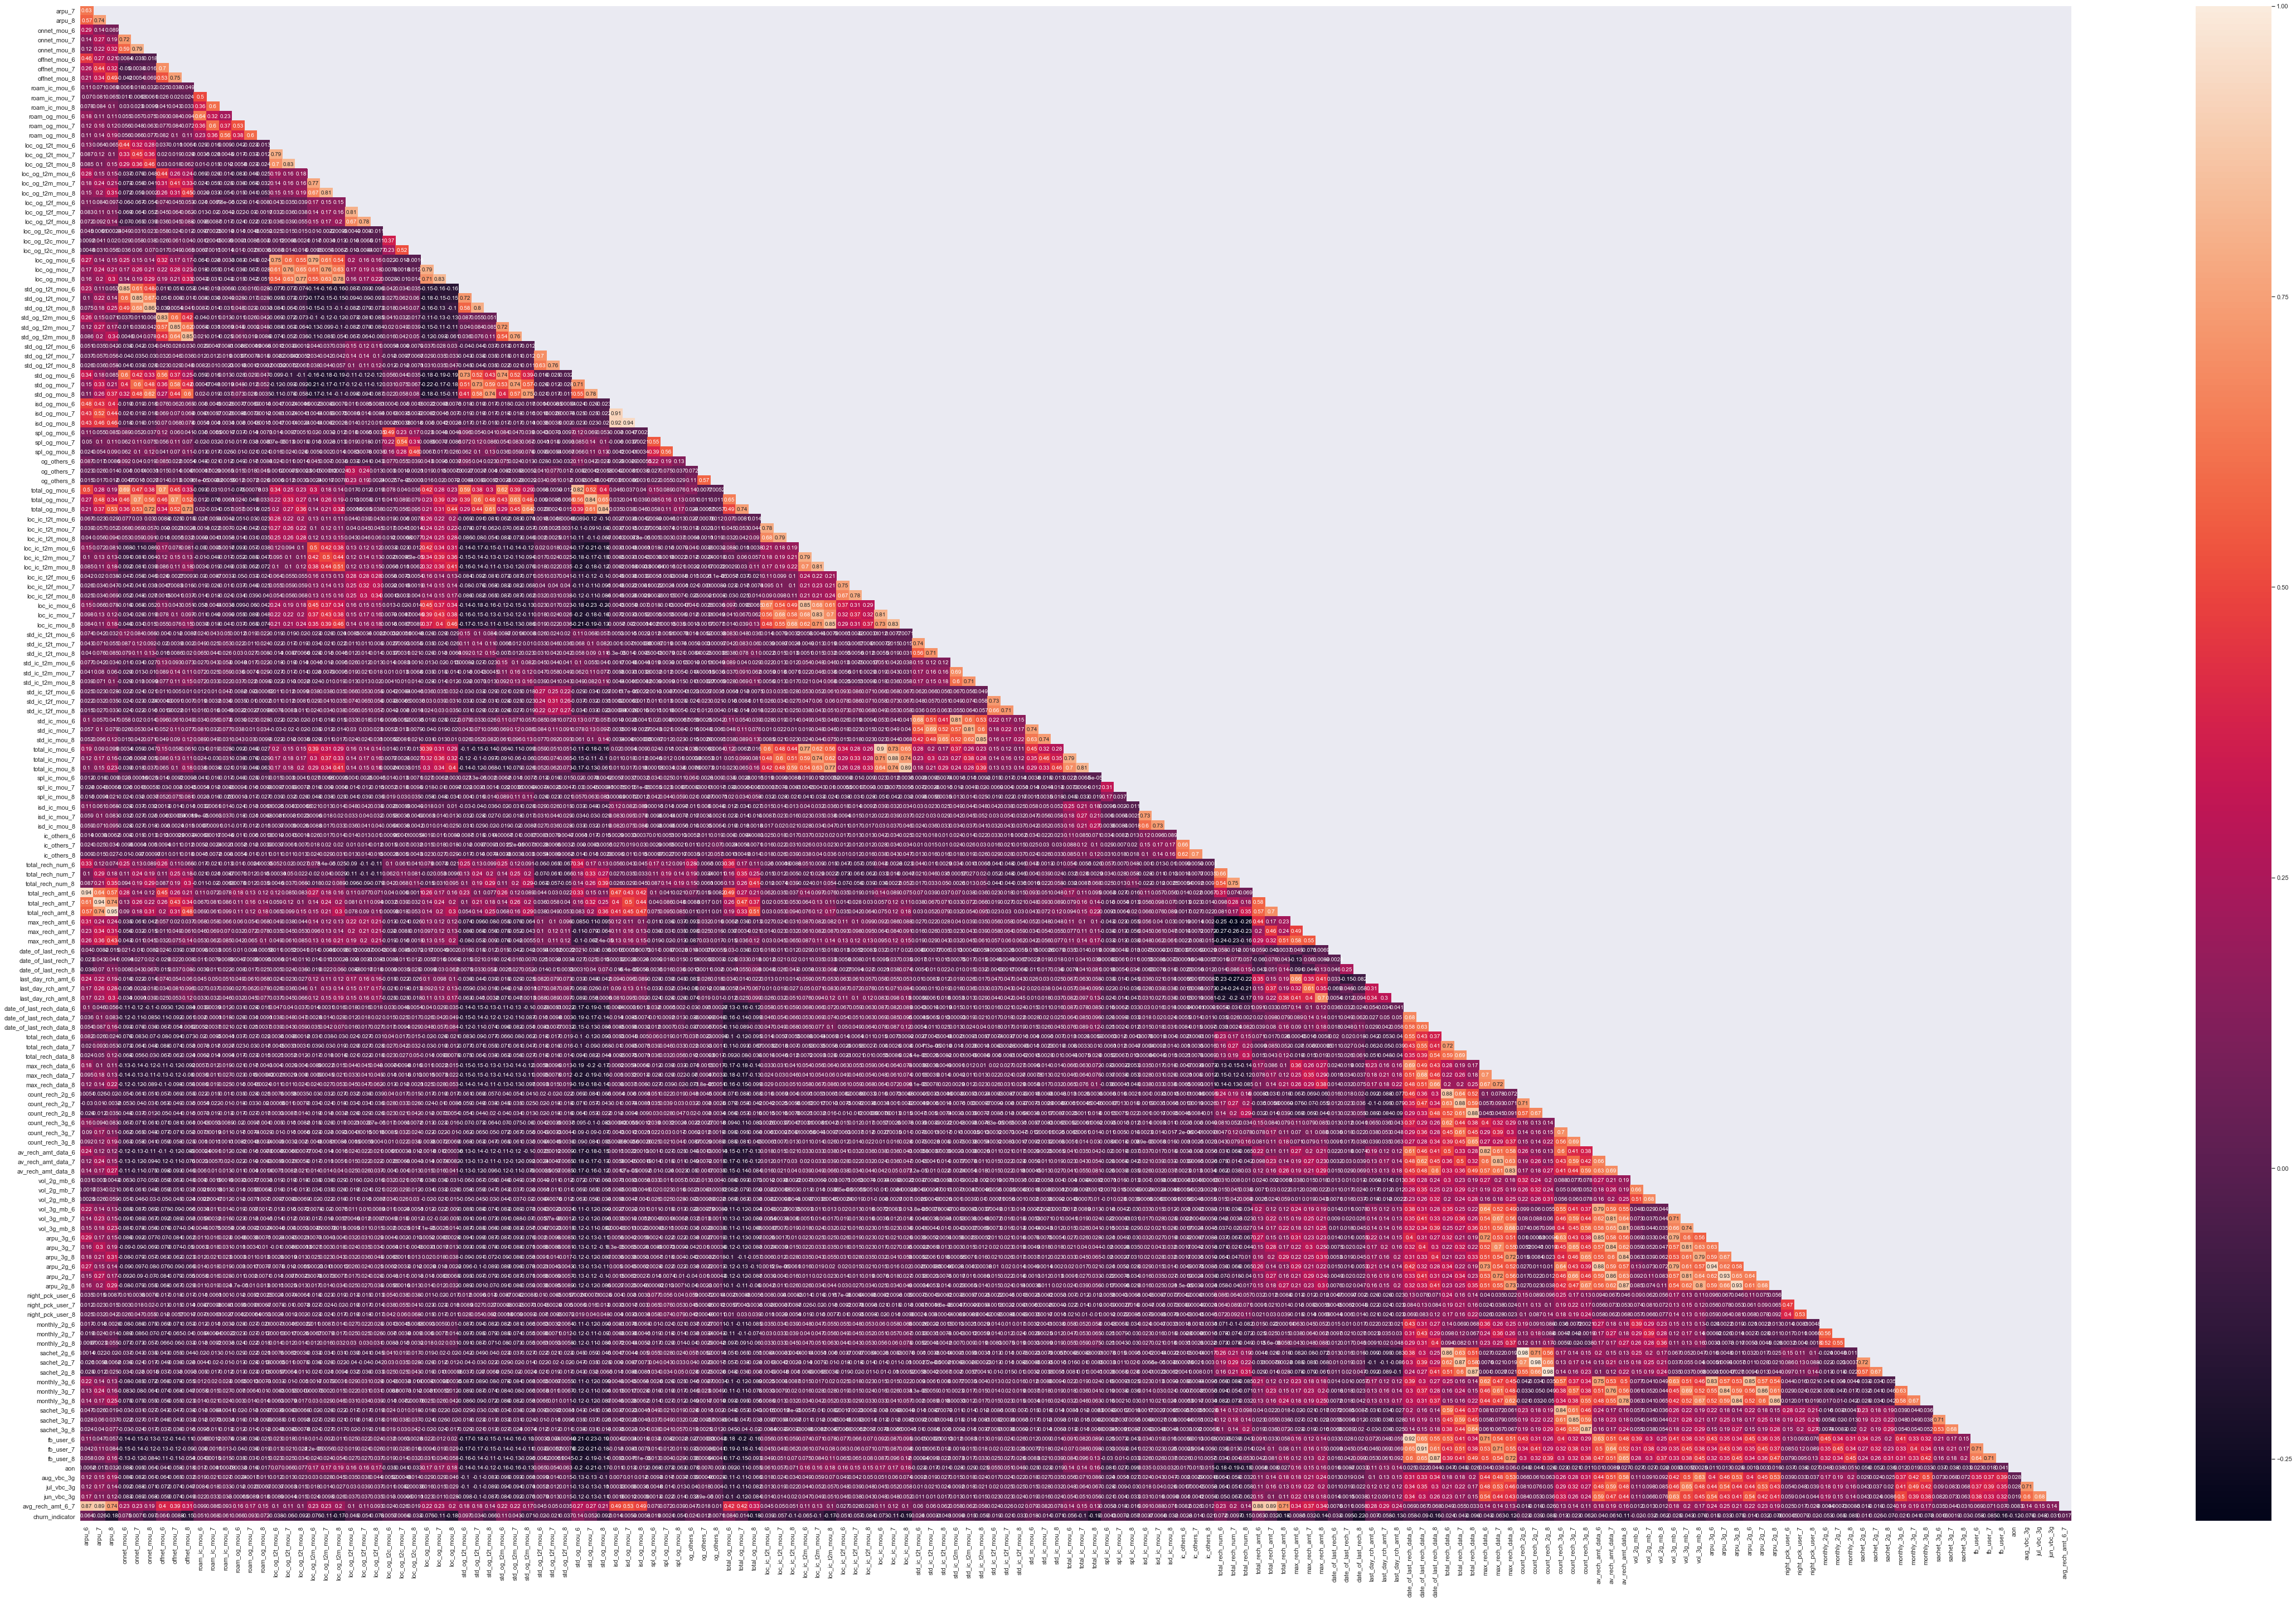

In [86]:
# Let's see the correlation matrix 
plt.figure(figsize = (80,50))        # Size of the figure
# mask
df_corr=df_hvc.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns_plot= sns.heatmap(corr, mask=mask, annot=True,fmt='.2g')
bottom,top=sns_plot.get_ylim()
fig = sns_plot.get_figure()
sns_plot.set_ylim(bottom + 0.5,top - 0.5)

## saving to a out file for better viewing
fig.savefig("output.png")
# yticks
plt.yticks(rotation=0)
plt.show()

In [87]:
c2 = df_hvc.corr()

In [88]:
corr_matrix = df_hvc.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
              .stack()
              .sort_values(ascending=False))

In [89]:
sol[sol.values > 0.70]

count_rech_2g_8           sachet_2g_8           0.981607
count_rech_2g_7           sachet_2g_7           0.979649
count_rech_2g_6           sachet_2g_6           0.976342
arpu_8                    total_rech_amt_8      0.953725
isd_og_mou_7              isd_og_mou_8          0.941347
arpu_6                    total_rech_amt_6      0.941256
arpu_7                    total_rech_amt_7      0.937114
arpu_3g_6                 arpu_2g_6             0.937111
arpu_3g_8                 arpu_2g_8             0.934649
arpu_3g_7                 arpu_2g_7             0.933079
date_of_last_rech_data_6  fb_user_6             0.919048
isd_og_mou_6              isd_og_mou_8          0.916058
                          isd_og_mou_7          0.914963
date_of_last_rech_data_7  fb_user_7             0.911908
loc_ic_mou_6              total_ic_mou_6        0.895624
total_rech_amt_7          avg_rech_amt_6_7      0.892365
arpu_7                    avg_rech_amt_6_7      0.890903
loc_ic_mou_8              total

### Model Building

In [90]:
import statsmodels.api as sm

In [91]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), famit = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        churn_indicator   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38209
Model Family:                Gaussian   Df Model:                          158
Link Function:               identity   Scale:                        0.067167
Method:                          IRLS   Log-Likelihood:                -2554.5
Date:                Thu, 27 May 2021   Deviance:                       2566.4
Time:                        19:17:37   Pearson chi2:                 2.57e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9556      0.019     49.188      0.000       0.918       0.994
arpu_6                       0.0057      0.005      1.172      0.241      -0.004       0.015
arpu_7                       0.0075      0.006      1.267      0.205      -0.004       0.019
arpu_8                       0.0042      0.006      0.693      0.489      -0.008       0.016
onnet_mou_6                 -0.4146      0.142     -2.923      0.003      -0.693      -0.137
onnet_mou_7                 -0.0525      0.076     -0.687      0.492      -0.202       0.097
onnet_mou_8                  0.0587      0.080      0.732      0.464      -0.098       0.216
offnet_mou_6                -0.3887      0.148     -2.633      0.008      -0.678      -0.099
offnet_mou_7                -0.0857      0.078     -1.095      0.274      -0.239       0.068
offnet_mou_8                -0.0063      0.078     -0.081      0.935      -0.159       0.146
roam_ic_mou_6                0.0037      0.002      1.652      0.099      -0.001       0.008
roam_ic_mou_7                0.0026      0.003      0.976      0.329      -0.003       0.008
roam_ic_mou_8               -0.0006      0.003     -0.227      0.821      -0.006       0.004
roam_og_mou_6                0.0999      0.037      2.701      0.007       0.027       0.172
roam_og_mou_7                0.0210      0.018      1.197      0.231      -0.013       0.055
roam_og_mou_8                0.0022      0.020      0.108      0.914      -0.037       0.041
loc_og_t2t_mou_6            94.7193     57.784      1.639      0.101     -18.535     207.974
loc_og_t2t_mou_7           182.3502     53.800      3.389      0.001      76.904     287.796
loc_og_t2t_mou_8           784.3829     52.739     14.873      0.000     681.016     887.750
loc_og_t2m_mou_6            97.8271     59.700      1.639      0.101     -19.182     214.836
loc_og_t2m_mou_7           187.4201     55.292      3.390      0.001      79.050     295.790
loc_og_t2m_mou_8           823.5844     55.373     14.873      0.000     715.055     932.114
loc_og_t2f_mou_6            10.2008      6.224      1.639      0.101      -1.999      22.400
loc_og_t2f_mou_7            19.6504      5.798      3.389      0.001       8.287      31.014
loc_og_t2f_mou_8            66.8470      4.494     14.873      0.000      58.038      75.656
loc_og_t2c_mou_6             0.0005      0.002      0.307      0.759      -0.003       0.004
loc_og_t2c_mou_7             0.0057      0.002      2.916      0.004       0.002       0.010
loc_og_t2c_mou_8            -0.0005      0.002     -0.279      0.780      -0.004       0.003
loc_og_mou_6              -388.7742    113.240     -3.433      0.001    -610.721    -166.828
loc_og_mou_7              -454.5737    110.241     -4.123      0.000    -670.641    -238.506
loc_og_mou_8  

### Feature Selection Using RFE

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [93]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
## re checking model

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
col = col.drop(['total_rech_data_7'], 1)
col

In [ ]:
# rechecking model

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
col = col.drop(['total_rech_data_6'], 1)


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# rechecking model

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
col = col.drop(['sachet_2g_7'], 1)


In [ ]:
# rechecking model

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
col = col.drop(['monthly_3g_7'], 1)


In [ ]:
col=col.drop(['monthly_3g_6'],1)

In [ ]:
# rechecking model

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
#X_train = X_train[col]

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

In [ ]:
#Predicted    not_churn  churn
#Actual
#not_churn    19036      148
#churn        1528       295  

In [ ]:
confusion

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

In [ ]:
### Plotting ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )

    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve, 0.1 is the optimum point to take as a cutoff probability

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
#Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

In [ ]:
# Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

### Precision and recall tradeoff



In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Churn, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g--")
plt.plot(thresholds, r[:-1], "r--")
plt.show()

### Making predictions on the test set

In [ ]:
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [ ]:
#X_test = X_test[col]
#X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test[col])

In [ ]:
X_test_sm

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
y_test_df

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','churn_indicator','Churn_Prob']]

In [ ]:
y_pred_final

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_indicator, y_pred_final.final_predicted)

In [ ]:
confusion3 = metrics.confusion_matrix(y_pred_final.churn_indicator, y_pred_final.final_predicted )
confusion3

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_train.shape

In [ ]:
pca = PCA(n_components=0.95, random_state=42)

In [ ]:
df_pca = pca.fit(X_train)

In [ ]:
pca.components_

In [ ]:
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

In [ ]:
(pca.explained_variance_ratio_)*100

In [ ]:
variance  = (pca.explained_variance_ratio_)*100

In [ ]:
variance = pd.DataFrame(variance)

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

##### Making the scree plot

In [ ]:
plt.plot(range(1,len(var_cumu)+1), var_cumu);

In [ ]:
print(pca.n_components_)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
xi = np.arange(1, 70, step=1)

plt.ylim(0.0,1.1)
plt.plot(xi, var_cumu, marker='o', linestyle='--', color='b')

#plt.plot(range(1,len(var_cumu)+1), var_cumu)

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 70, step=1), rotation =90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=69, color ="black",linestyle='--')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show();

##### Observation: Around 69 PCs can describe 95% of the data
    

### Apply the mapping (transform) to both the training set and the test set

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print('X_train-Shape', X_train.shape)
print('X_test-Shape', X_test.shape)
print('train_pca-Shape', X_train_pca.shape)
print('test_pca-Shape', X_test_pca.shape)

In [ ]:
X_train_pca

### Logistic Regression building with PCA components

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(X_train_pca, y_train)

In [ ]:
# Predict for One Observation

logisticRegr.predict(X_test_pca[0].reshape(1,-1))

In [ ]:
# Predict for One Observation (image)

logisticRegr.predict(X_test_pca[0:70])

In [ ]:
# Measuring Model Performance with accuracy

logisticRegr.score(X_test_pca, y_test)

##### Measuring Model Performance of train set 

In [ ]:
y_train_pred= logisticRegr.predict_proba(X_train_pca)[:,1]

In [ ]:
y_train_pred

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

###  Finding Optimal Cutoff Point


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

In [ ]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Making predictions on the test set

In [ ]:
y_test_pred=logisticRegr.predict_proba(X_test_pca)[:,1]

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head(70)

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','churn_indicator','Churn_Prob']]

In [ ]:
y_pred_final

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_indicator, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn_indicator, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboosting = GradientBoostingClassifier()
gradientboosting.fit(X_train, y_train)

In [ ]:
y_preds = gradientboosting.predict(X_test)

confusion3 = metrics.confusion_matrix(y_test, y_preds)
confusion3

In [ ]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

### Gradient Boosting with PCA

In [ ]:
gradientboosting2 = GradientBoostingClassifier()
gradientboosting2.fit(X_train_pca, y_train)

In [ ]:
y_preds2 = gradientboosting2.predict_proba(X_test_pca)[:,1]

y_preds2

In [ ]:
y_preds2[y_preds2 > 0.1] = 1

In [ ]:
y_preds2[y_preds2 <= 0.1] = 0

In [ ]:
confusion4 = metrics.confusion_matrix(y_test, y_preds2)
confusion4

In [ ]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

### XGBoosting

In [ ]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

In [ ]:
y_preds3 = xgboost.predict(X_test)

confusion5 = metrics.confusion_matrix(y_test, y_preds3)
confusion5

In [ ]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

### XGBoosting with PCA

In [ ]:
xgboost2 = XGBClassifier(classmethod='balanced')
xgboost2.fit(X_train_pca, y_train)

In [ ]:
y_preds4 = xgboost2.predict_proba(X_test_pca)[:,1]

y_preds4

In [ ]:
y_preds4[y_preds4 > 0.1] = 1

In [ ]:
y_preds4[y_preds4 <= 0.1] = 0

In [ ]:
confusion6 = metrics.confusion_matrix(y_test, y_preds4)
confusion6

In [ ]:
TP = confusion6[1,1] # true positive 
TN = confusion6[0,0] # true negatives
FP = confusion6[0,1] # false positives
FN = confusion6[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)